# **A Simulation Model on Coil Production System for Inventory and Capacity Analysis Through Optimization Process**

# Libraries & Dataset Preparation

**Import Libraries**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, differential_evolution

**Define File Paths & Load Data from CSV Files**

In [ ]:
# File paths to CSV files (adjust if necessary)
file_path_1 = "/content/drive/MyDrive/Data 1.csv"
file_path_2 = "/content/drive/MyDrive/Data 2.csv"

# Load CSV files safely with error-checking
try:
    df1 = pd.read_csv(file_path_1)
    df2 = pd.read_csv(file_path_2)
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure './1.csv' and './2.csv' exist.")
    exit(1)

**Filter Conveyor-related Columns and Extract Data**

In [ ]:
# Identify conveyor-related columns in both CSV files
conveyor_cols_1 = [col for col in df1.columns if "Conveyor" in col and ("PartsEntered" in col or "PartsCurrent" in col or "PartsExited" in col)]
conveyor_cols_2 = [col for col in df2.columns if "Conveyor" in col and ("PartsMinTime" in col or "PartsMaxTime" in col or "PartsTotalTime" in col)]

if not conveyor_cols_1 or not conveyor_cols_2:
    print("Error: No conveyor-related columns found in CSVs.")
    exit(1)

# Extract relevant simulation time and conveyor-related data
df_conveyors_1 = df1[["Simulation Time"] + conveyor_cols_1]
df_conveyors_2 = df2[["Simulation Time"] + conveyor_cols_2]

# Identify unique conveyor names based on "PartsCurrent" columns
conveyor_names = sorted(set([col.split(":")[0] for col in conveyor_cols_1 if "PartsCurrent" in col]))

if not conveyor_names:
    print("Error: No conveyor names identified.")
    exit(1)

# Inventory Analysis

**Inventory Levels Over Time for Conveyors**

Inventory Analysis:
Conveyor: Avg Inventory = 6.93, Max Inventory = 8.00
Conveyor #2: Avg Inventory = 5.39, Max Inventory = 7.00
Conveyor #3: Avg Inventory = 3.85, Max Inventory = 6.00
Conveyor #4: Avg Inventory = 3.54, Max Inventory = 6.00
Conveyor #5: Avg Inventory = 3.68, Max Inventory = 9.00
Conveyor #6: Avg Inventory = 4.11, Max Inventory = 12.00
Conveyor #7: Avg Inventory = 6.81, Max Inventory = 15.00
Conveyor #8: Avg Inventory = 0.01, Max Inventory = 1.00


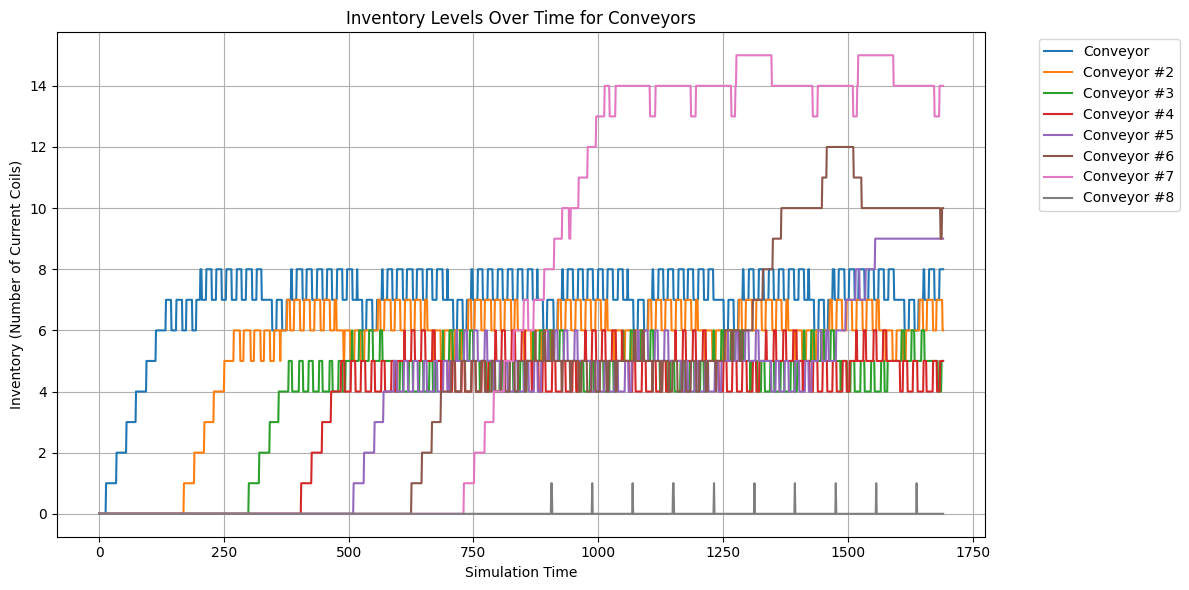

In [ ]:
# --- Inventory Analysis ---
inventory_stats = {}
for col in [c for c in conveyor_cols_1 if "PartsCurrent" in c]:
    conveyor_name = col.split(":")[0]
    avg_inventory = df_conveyors_1[col].mean()
    max_inventory = df_conveyors_1[col].max()
    inventory_stats[conveyor_name] = {"Average Inventory": avg_inventory, "Max Inventory": max_inventory}

print("Inventory Analysis:")
for conveyor, stats in inventory_stats.items():
    print(f"{conveyor}: Avg Inventory = {stats['Average Inventory']:.2f}, Max Inventory = {stats['Max Inventory']:.2f}")

# Plot Inventory Over Time
plt.figure(figsize=(12, 6))
for col in [c for c in conveyor_cols_1 if "PartsCurrent" in c]:
    conveyor_name = col.split(":")[0]
    plt.plot(df_conveyors_1["Simulation Time"], df_conveyors_1[col], label=conveyor_name)
plt.xlabel("Simulation Time")
plt.ylabel("Inventory (Number of Current Coils)")
plt.title("Inventory Levels Over Time for Conveyors")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

**Average Inventory per Conveyor**

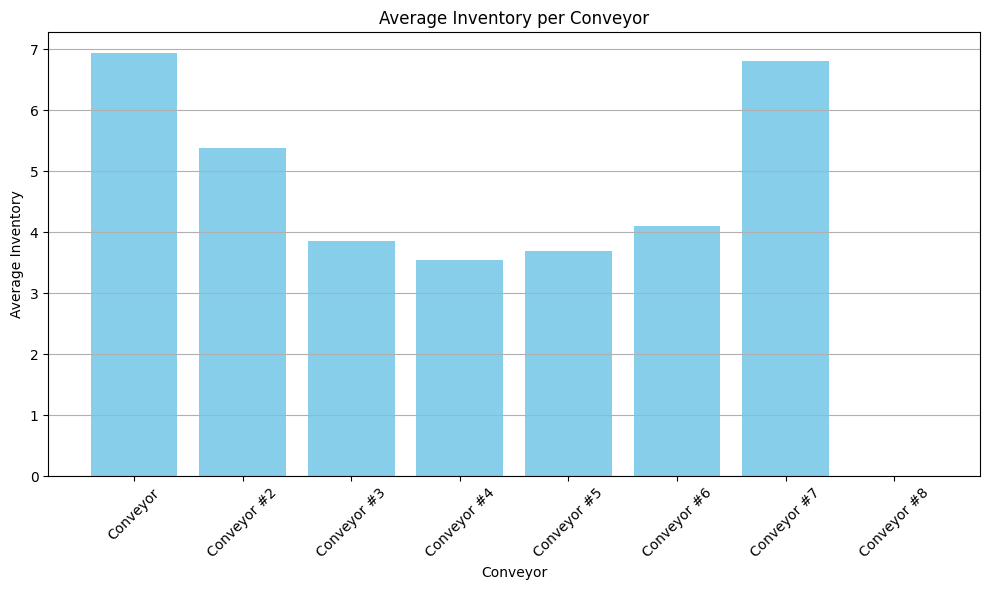

In [ ]:
# Plot Average Inventory (Bar Chart)
plt.figure(figsize=(10, 6))
conveyors = list(inventory_stats.keys())
avg_inventories = [inventory_stats[c]["Average Inventory"] for c in conveyors]
plt.bar(conveyors, avg_inventories, color='skyblue')
plt.xlabel("Conveyor")
plt.ylabel("Average Inventory")
plt.title("Average Inventory per Conveyor")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Inventory Heatmap Over Time**

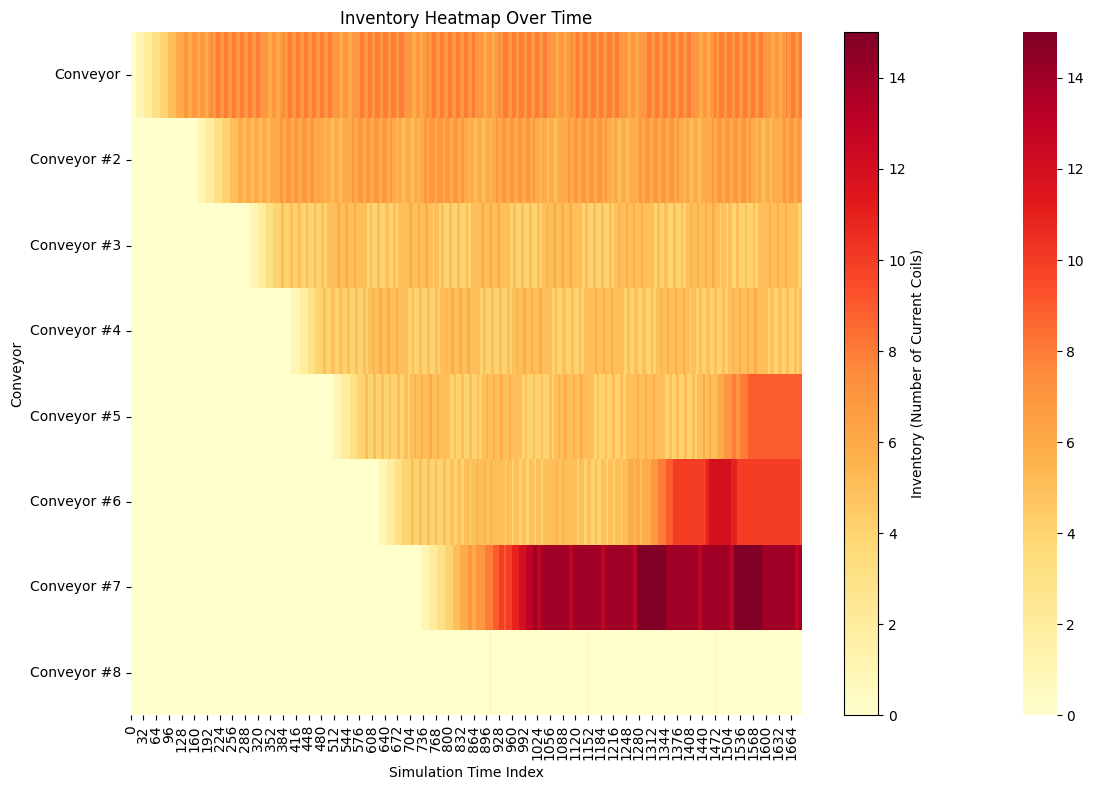

In [ ]:
# Inventory Heatmap
plt.figure(figsize=(12, 8))
inventory_data = df_conveyors_1[[col for col in conveyor_cols_1 if "PartsCurrent" in col]].copy()
inventory_data.columns = [col.split(":")[0] for col in inventory_data.columns]
sns_heatmap = sns.heatmap(inventory_data.T, cmap="YlOrRd")
plt.colorbar(sns_heatmap.collections[0]).set_label("Inventory (Number of Current Coils)")
plt.xlabel("Simulation Time Index")
plt.ylabel("Conveyor")
plt.title("Inventory Heatmap Over Time")
plt.tight_layout()
plt.show()

**Cumulative Inventory Across All Conveyors Over Time**

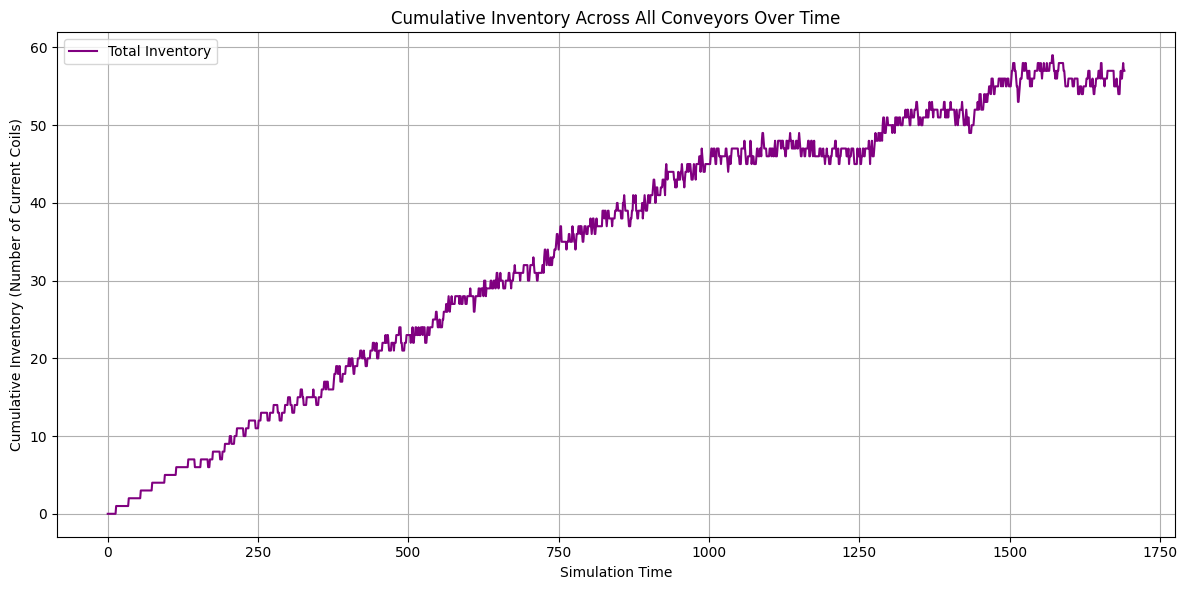

In [ ]:
# Cumulative Inventory Plot
plt.figure(figsize=(12, 6))
cumulative_inventory = df_conveyors_1[[col for col in conveyor_cols_1 if "PartsCurrent" in col]].sum(axis=1)
plt.plot(df_conveyors_1["Simulation Time"], cumulative_inventory, color='purple', label="Total Inventory")
plt.xlabel("Simulation Time")
plt.ylabel("Cumulative Inventory (Number of Current Coils)")
plt.title("Cumulative Inventory Across All Conveyors Over Time")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Capacity Analysis

**Throughput Over Time for Conveyors**


Capacity Analysis:
Conveyor: Total Coils Exited = 85.00, Throughput = 0.0503 coils/time, Total Processing Time = 12565.85
Conveyor #2: Total Coils Exited = 78.00, Throughput = 0.0461 coils/time, Total Processing Time = 9797.68
Conveyor #3: Total Coils Exited = 72.00, Throughput = 0.0426 coils/time, Total Processing Time = 7059.82
Conveyor #4: Total Coils Exited = 66.00, Throughput = 0.0390 coils/time, Total Processing Time = 6588.92
Conveyor #5: Total Coils Exited = 49.00, Throughput = 0.0290 coils/time, Total Processing Time = 7337.03
Conveyor #6: Total Coils Exited = 35.00, Throughput = 0.0207 coils/time, Total Processing Time = 8113.12
Conveyor #7: Total Coils Exited = 11.00, Throughput = 0.0065 coils/time, Total Processing Time = 13161.48
Conveyor #8: Total Coils Exited = 10.00, Throughput = 0.0059 coils/time, Total Processing Time = 13.80


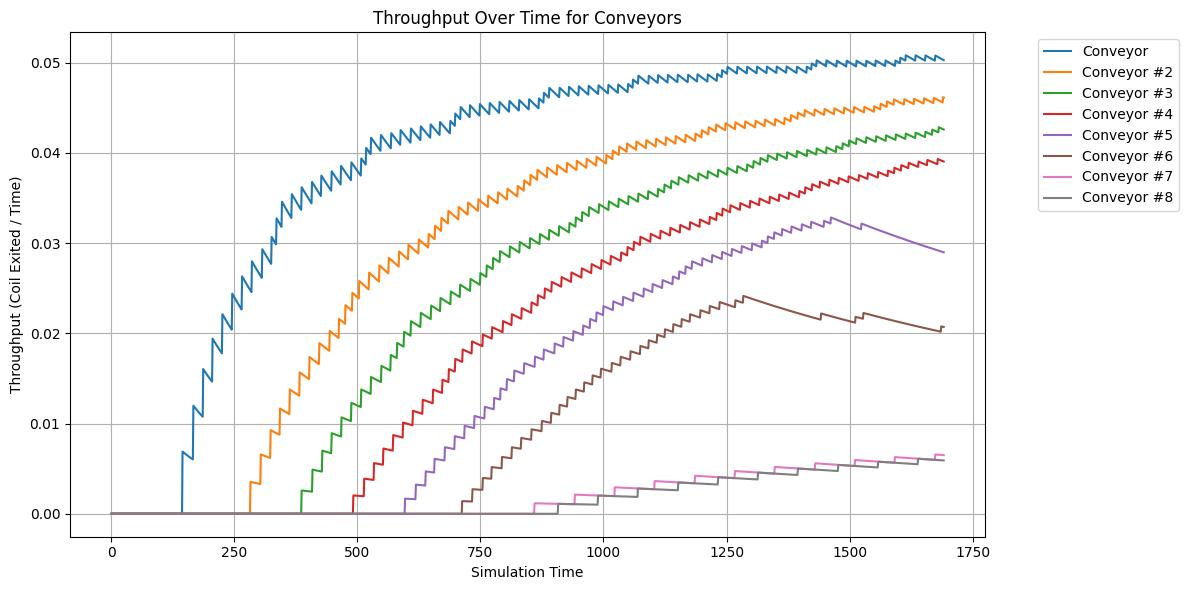

In [ ]:
# --- Capacity Analysis ---
capacity_stats = {}
throughput_cols = [c for c in conveyor_cols_1 if "PartsExited" in c]
total_time_cols = [c for c in conveyor_cols_2 if "PartsTotalTime" in c]

for i, col in enumerate(throughput_cols):
    conveyor_name = col.split(":")[0]
    total_parts_exited = df_conveyors_1[col].iloc[-1]
    total_time = df_conveyors_2[total_time_cols[i]].iloc[-1]
    simulation_duration = df_conveyors_1["Simulation Time"].iloc[-1]
    throughput = total_parts_exited / simulation_duration if simulation_duration > 0 else 0
    capacity_stats[conveyor_name] = {
        "Total Parts Exited": total_parts_exited,
        "Throughput": throughput,
        "Total Processing Time": total_time
    }

print("\nCapacity Analysis:")
for conveyor, stats in capacity_stats.items():
    print(f"{conveyor}: Total Coils Exited = {stats['Total Parts Exited']:.2f}, "
          f"Throughput = {stats['Throughput']:.4f} coils/time, "
          f"Total Processing Time = {stats['Total Processing Time']:.2f}")

# Plot Throughput Over Time
plt.figure(figsize=(12, 6))
for col in throughput_cols:
    conveyor_name = col.split(":")[0]
    cumulative_exited = df_conveyors_1[col]
    plt.plot(df_conveyors_1["Simulation Time"], cumulative_exited / df_conveyors_1["Simulation Time"].replace(0, np.nan), label=conveyor_name)
plt.xlabel("Simulation Time")
plt.ylabel("Throughput (Coil Exited / Time)")
plt.title("Throughput Over Time for Conveyors")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

**Distribution of Original Throughput Across Conveyors**

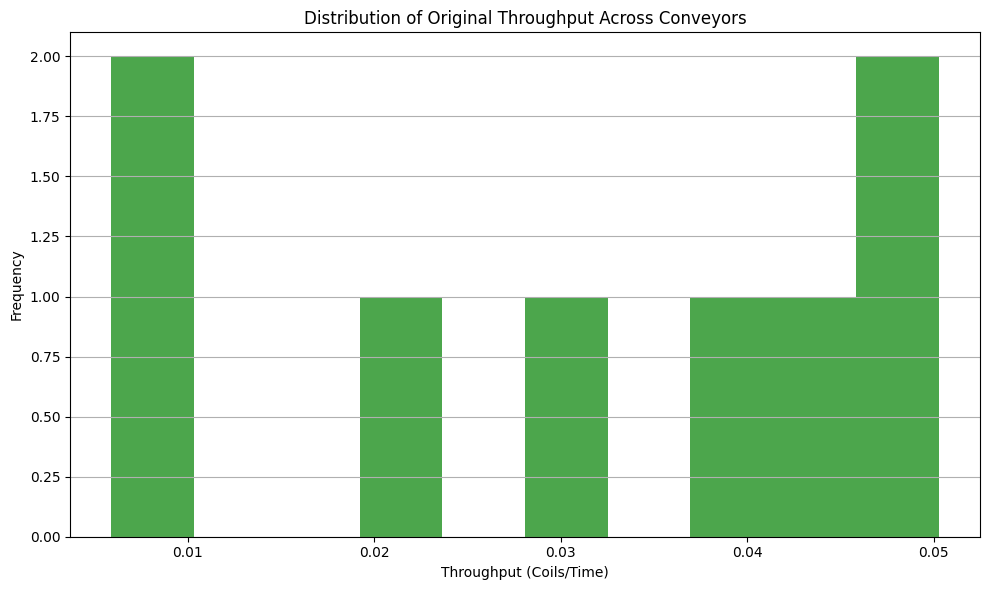

In [ ]:
plt.figure(figsize=(10, 6))
orig_throughputs = [capacity_stats[c]["Throughput"] for c in conveyor_names]
plt.hist(orig_throughputs, bins=10, color='green', alpha=0.7)
plt.xlabel("Throughput (Coils/Time)")
plt.ylabel("Frequency")
plt.title("Distribution of Original Throughput Across Conveyors")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Throughput Heatmap Over Time**

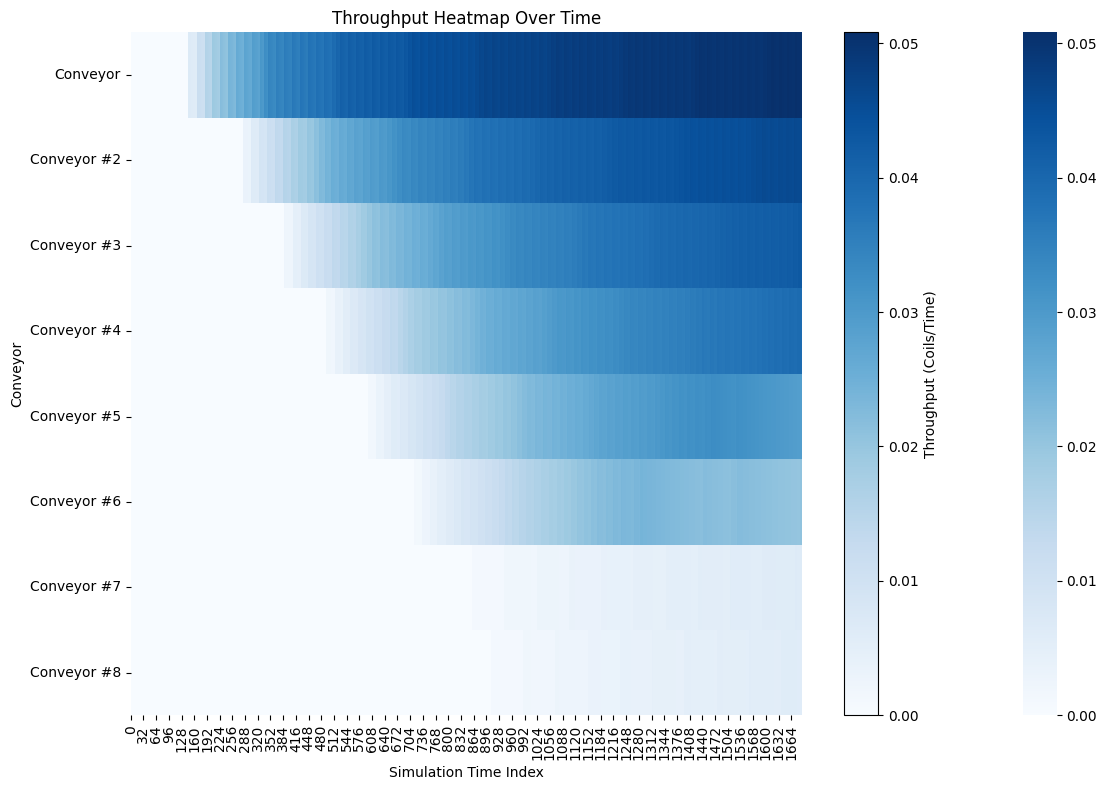

In [ ]:
# Throughput Heatmap
plt.figure(figsize=(12, 8))
throughput_data = pd.DataFrame(index=df_conveyors_1.index)
for col in throughput_cols:
    conveyor_name = col.split(":")[0]
    cumulative_exited = df_conveyors_1[col]
    throughput_data[conveyor_name] = cumulative_exited / df_conveyors_1["Simulation Time"].replace(0, np.nan)
sns_heatmap = sns.heatmap(throughput_data.T, cmap="Blues")
plt.colorbar(sns_heatmap.collections[0]).set_label("Throughput (Coils/Time)")
plt.xlabel("Simulation Time Index")
plt.ylabel("Conveyor")
plt.title("Throughput Heatmap Over Time")
plt.tight_layout()
plt.show()

# Lean (Muda) Analysis


Lean Waste Analysis:
Conveyor: Inventory Waste = 5.93, Waiting Waste = 147.83, Overproduction Waste = 0.0203
Conveyor #2: Inventory Waste = 4.39, Waiting Waste = 125.61, Overproduction Waste = 0.0161
Conveyor #3: Inventory Waste = 2.85, Waiting Waste = 98.05, Overproduction Waste = 0.0126
Conveyor #4: Inventory Waste = 2.54, Waiting Waste = 99.83, Overproduction Waste = 0.0090
Conveyor #5: Inventory Waste = 2.68, Waiting Waste = 149.74, Overproduction Waste = 0.0000
Conveyor #6: Inventory Waste = 3.11, Waiting Waste = 231.80, Overproduction Waste = 0.0000
Conveyor #7: Inventory Waste = 5.81, Waiting Waste = 1196.50, Overproduction Waste = 0.0000
Conveyor #8: Inventory Waste = 0.00, Waiting Waste = 1.38, Overproduction Waste = 0.0000


<ipython-input-12-a6cd53d161df>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=sizes, palette="Set2")


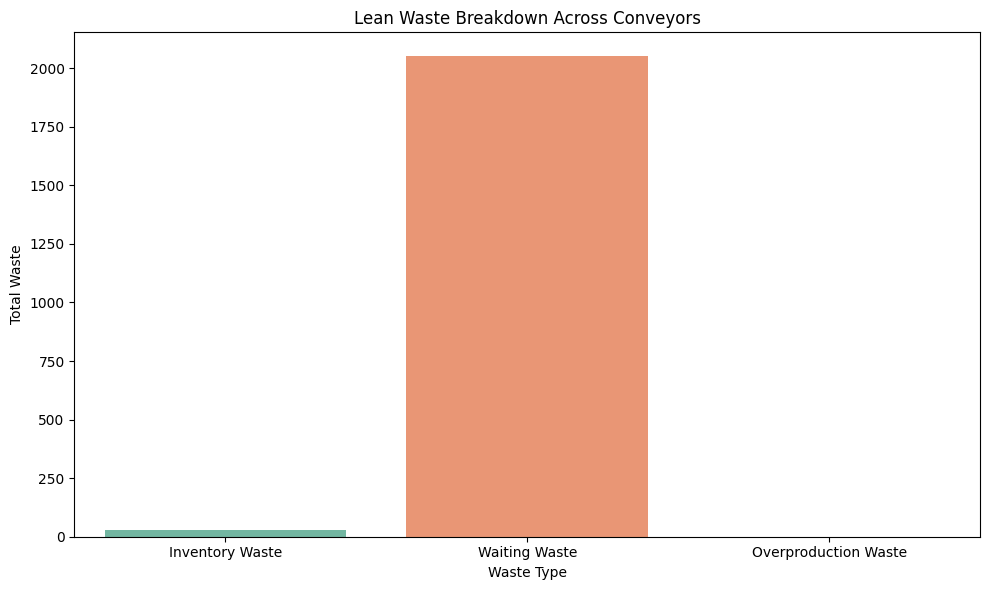

In [ ]:
# --- Lean Waste Analysis ---
lean_waste_stats = {}
for conveyor in conveyor_names:
    avg_inventory = inventory_stats[conveyor]["Average Inventory"]
    total_time = capacity_stats[conveyor]["Total Processing Time"]
    parts_exited = capacity_stats[conveyor]["Total Parts Exited"]
    time_per_part = total_time / parts_exited if parts_exited > 0 else float('inf')
    # Waste metrics
    inventory_waste = max(0, avg_inventory - 1)  # Excess inventory above minimal buffer (JIT)
    waiting_waste = time_per_part if time_per_part != float('inf') else 0  # Time per part as proxy for waiting
    overproduction_waste = max(0, capacity_stats[conveyor]["Throughput"] - np.mean(orig_throughputs))  # Excess throughput
    lean_waste_stats[conveyor] = {
        "Inventory Waste": inventory_waste,
        "Waiting Waste": waiting_waste,
        "Overproduction Waste": overproduction_waste
    }

print("\nLean Waste Analysis:")
for conveyor, stats in lean_waste_stats.items():
    print(f"{conveyor}: Inventory Waste = {stats['Inventory Waste']:.2f}, "
          f"Waiting Waste = {stats['Waiting Waste']:.2f}, "
          f"Overproduction Waste = {stats['Overproduction Waste']:.4f}")

# Plot Waste Breakdown (Bar Chart)
plt.figure(figsize=(10, 6))
waste_types = ["Inventory Waste", "Waiting Waste", "Overproduction Waste"]
total_wastes = [sum(stats[w] for stats in lean_waste_stats.values()) for w in waste_types]
labels = [wt for wt, total in zip(waste_types, total_wastes) if total > 0]
sizes = [total for total in total_wastes if total > 0]
sns.barplot(x=labels, y=sizes, palette="Set2")
plt.title("Lean Waste Breakdown Across Conveyors")
plt.ylabel("Total Waste")
plt.xlabel("Waste Type")
plt.tight_layout()
plt.savefig('lean_waste_bar.png')

# Bottleneck Analysis

**Bottleneck Analysis for Conveyors**


Bottleneck Analysis (Higher score indicates worse bottleneck):
Conveyor #7: Bottleneck Score = 8149.91
Conveyor: Bottleneck Score = 1024.44
Conveyor #6: Bottleneck Score = 952.56
Conveyor #2: Bottleneck Score = 676.46
Conveyor #5: Bottleneck Score = 551.68
Conveyor #3: Bottleneck Score = 377.61
Conveyor #4: Bottleneck Score = 353.31
Conveyor #8: Bottleneck Score = 0.01


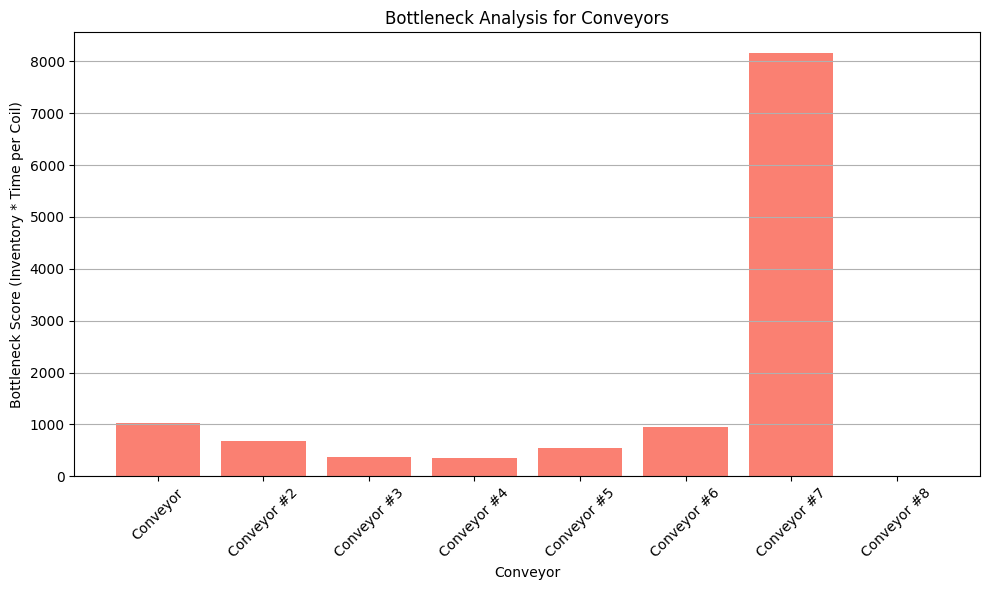

In [ ]:
# --- Bottleneck Analysis ---
bottleneck_scores = {}
for conveyor in capacity_stats:
    avg_inventory = inventory_stats[conveyor]["Average Inventory"]
    total_time = capacity_stats[conveyor]["Total Processing Time"]
    parts_exited = capacity_stats[conveyor]["Total Parts Exited"]
    time_per_part = total_time / parts_exited if parts_exited > 0 else float('inf')
    bottleneck_score = avg_inventory * time_per_part if time_per_part != float('inf') else 0
    bottleneck_scores[conveyor] = bottleneck_score

print("\nBottleneck Analysis (Higher score indicates worse bottleneck):")
for conveyor, score in sorted(bottleneck_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{conveyor}: Bottleneck Score = {score:.2f}")

# Plot Bottleneck Scores (Bar Chart)
plt.figure(figsize=(10, 6))
scores = [bottleneck_scores[c] for c in conveyors]
plt.bar(conveyors, scores, color='salmon')
plt.xlabel("Conveyor")
plt.ylabel("Bottleneck Score (Inventory * Time per Coil)")
plt.title("Bottleneck Analysis for Conveyors")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Bottleneck Contribution Pie Chart**

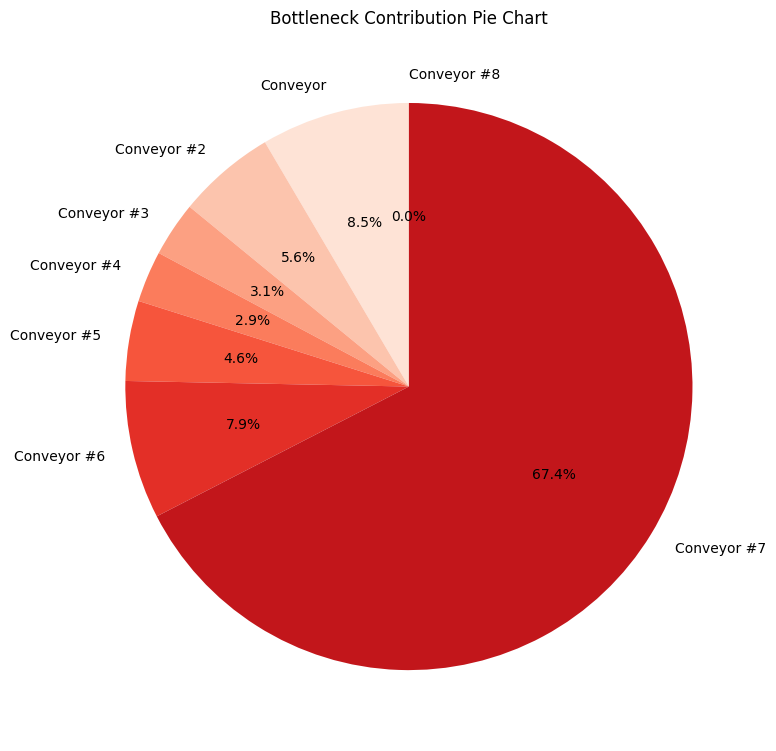

In [ ]:
# Bottleneck Contribution Pie Chart
plt.figure(figsize=(8, 8))
total_bottleneck = sum(score for score in bottleneck_scores.values() if score > 0)
labels = [c for c in conveyors if bottleneck_scores[c] > 0]
sizes = [bottleneck_scores[c] / total_bottleneck * 100 for c in labels]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Reds", len(labels)))
plt.title("Bottleneck Contribution Pie Chart")
plt.tight_layout()
plt.show()

**Bottleneck Score vs Throughput Scatter Plot**

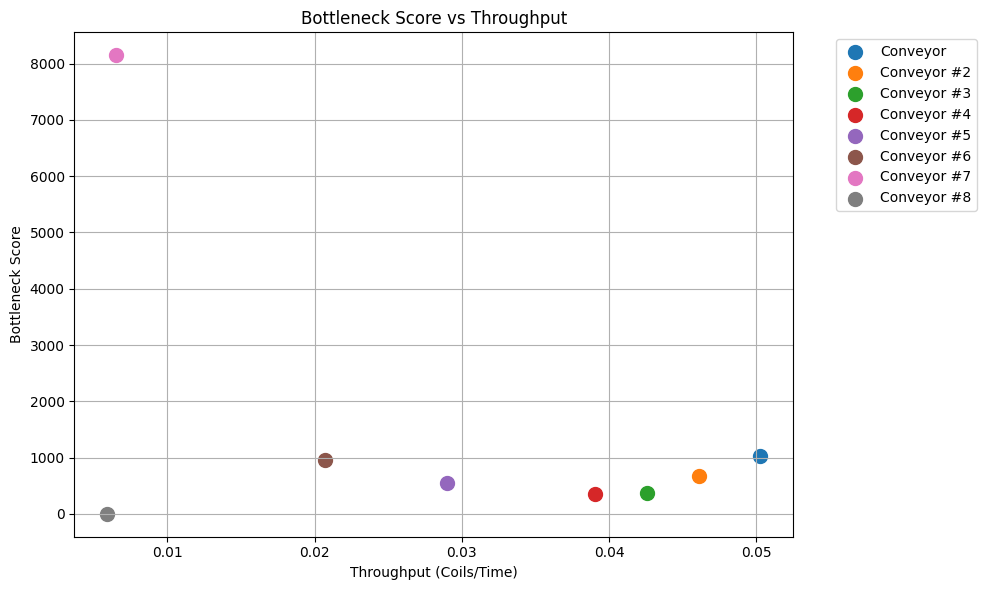

In [ ]:
# Bottleneck Score vs Throughput Scatter Plot
plt.figure(figsize=(10, 6))
for conveyor in conveyors:
    plt.scatter(capacity_stats[conveyor]["Throughput"], bottleneck_scores[conveyor], label=conveyor, s=100)
plt.xlabel("Throughput (Coils/Time)")
plt.ylabel("Bottleneck Score")
plt.title("Bottleneck Score vs Throughput")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

**Average Inventory, Throughput, and Bottleneck Scores into a DataFrame**

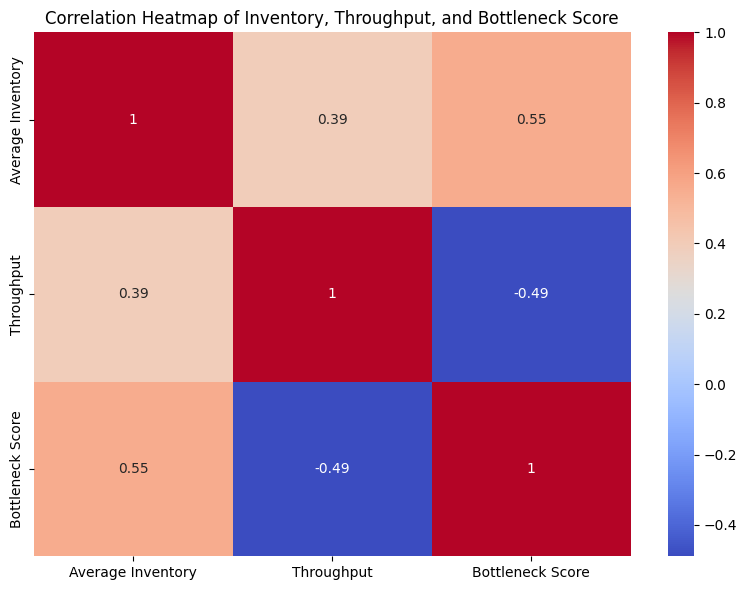

In [ ]:
# Combine average inventory, throughput, and bottleneck scores into a DataFrame
metrics_df = pd.DataFrame({
    "Average Inventory": {c: inventory_stats[c]["Average Inventory"] for c in conveyor_names},
    "Throughput": {c: capacity_stats[c]["Throughput"] for c in conveyor_names},
    "Bottleneck Score": bottleneck_scores
})
plt.figure(figsize=(8, 6))
sns.heatmap(metrics_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Inventory, Throughput, and Bottleneck Score")
plt.tight_layout()
plt.show()

# Optimization

**Optimization Run**

In [ ]:
# --- Optimization ---
current_time_per_part = {}
for conveyor in capacity_stats:
    parts_exited = capacity_stats[conveyor]["Total Parts Exited"]
    total_time = capacity_stats[conveyor]["Total Processing Time"]
    current_time_per_part[conveyor] = total_time / parts_exited if parts_exited > 0 else float('inf')

valid_conveyors = [c for c in conveyor_names if current_time_per_part[c] != float('inf')]
current_times = [current_time_per_part[c] for c in valid_conveyors]
current_inventory = [inventory_stats[c]["Average Inventory"] for c in valid_conveyors]
parts_exited = [capacity_stats[c]["Total Parts Exited"] for c in valid_conveyors]
simulation_duration = df_conveyors_1["Simulation Time"].iloc[-1]
total_current_throughput = sum(capacity_stats[c]["Total Parts Exited"] for c in valid_conveyors) / simulation_duration if simulation_duration > 0 else 0

if not valid_conveyors:
    print("Warning: No valid conveyors with finite time per part. Skipping optimization.")
    optimized_times = []
    new_inventory = {c: inventory_stats[c]["Average Inventory"] for c in conveyor_names}
    new_throughputs = {c: capacity_stats[c]["Throughput"] for c in conveyor_names}
else:
    # Define objective function: minimize bottleneck score and throughput deviation penalty
    def objective(times):
        new_inventories = [inv * (t / curr_t) for inv, t, curr_t in zip(current_inventory, times, current_times)]
        bottleneck_scores = [inv * t for inv, t in zip(new_inventories, times)]
        new_throughputs = [p / (t * simulation_duration) for p, t in zip(parts_exited, times)]
        throughput_penalty = 1000 * max(0, total_current_throughput - sum(new_throughputs)) ** 2
        return sum(bottleneck_scores) + throughput_penalty

    # Bounds: ±20% of current time per part
    bounds = [(t * 0.8, t * 1.2) for t in current_times]

    # Run hybrid optimization: DE followed by SLSQP
    try:
        # Step 1: Run Differential Evolution for global search
        de_result = differential_evolution(
            func=objective,
            bounds=bounds,
            maxiter=500,  # Moderate iterations for initial search
            popsize=10,   # Smaller population for speed
            tol=1e-4,     # Relaxed tolerance for faster DE
            disp=True,
            seed=42       # For reproducibility
        )

        # Step 2: Refine with SLSQP
        slsqp_result = minimize(
            fun=objective,
            x0=de_result.x,  # Start from DE's best solution
            method='SLSQP',
            bounds=bounds,
            options={'maxiter': 100, 'ftol': 1e-9, 'disp': True}
        )

        # Use SLSQP result if successful, else fall back to DE result
        if slsqp_result.success:
            optimized_times = slsqp_result.x
            result = slsqp_result  # For success status
        else:
            print("SLSQP refinement failed, using DE result...")
            optimized_times = de_result.x
            result = de_result

    except Exception as e:
        print(f"Optimization error: {e}. Applying heuristic...")
        optimized_times = []
        for c, t in zip(valid_conveyors, current_times):
            if bottleneck_scores[c] > np.median(list(bottleneck_scores.values())):
                new_t = t * 0.85  # Reduce by 15%
            else:
                new_t = t
            optimized_times.append(max(t * 0.8, min(t * 1.2, new_t)))
        result = type('obj', (), {'success': False})()  # Dummy result for heuristic case

    # Calculate new inventory and throughput with optimized times
    new_inventory = {c: inventory_stats[c]["Average Inventory"] * (opt_t / current_time_per_part[c])
                     for c, opt_t in zip(valid_conveyors, optimized_times)}
    new_throughputs = {c: capacity_stats[c]["Throughput"] * (current_time_per_part[c] / opt_t)
                       for c, opt_t in zip(valid_conveyors, optimized_times)}
    for c in conveyor_names:
        if c not in valid_conveyors:
            new_inventory[c] = inventory_stats[c]["Average Inventory"]
            new_throughputs[c] = capacity_stats[c]["Throughput"]

differential_evolution step 1: f(x)= 8640.094757035225
differential_evolution step 2: f(x)= 8437.088321481962
differential_evolution step 3: f(x)= 8222.119750076245
differential_evolution step 4: f(x)= 8222.119750076245
differential_evolution step 5: f(x)= 8222.119750076245
differential_evolution step 6: f(x)= 8222.119750076245
differential_evolution step 7: f(x)= 8120.346240426001
differential_evolution step 8: f(x)= 8036.95576980718
differential_evolution step 9: f(x)= 8036.95576980718
differential_evolution step 10: f(x)= 8036.95576980718
differential_evolution step 11: f(x)= 8036.95576980718
differential_evolution step 12: f(x)= 8036.95576980718
differential_evolution step 13: f(x)= 7994.456552092222
differential_evolution step 14: f(x)= 7994.456552092222
differential_evolution step 15: f(x)= 7994.456552092222
differential_evolution step 16: f(x)= 7940.360623575908
differential_evolution step 17: f(x)= 7940.360623575908
differential_evolution step 18: f(x)= 7940.360623575908
differ

**Throughput Efficiency Calculation**

In [ ]:
# Throughput Efficiency Calculation
original_total_throughput = sum(capacity_stats[c]["Throughput"] for c in conveyor_names)
optimized_total_throughput = sum(new_throughputs[c] for c in conveyor_names)
throughput_efficiency_gain = ((optimized_total_throughput - original_total_throughput) / original_total_throughput * 100) if original_total_throughput > 0 else 0

print("\nOptimization Results:")
if valid_conveyors:
    print("Optimization successful!" if result.success else "Using heuristic or DE result due to optimization failure.")
    print(f"Throughput Efficiency Gain: {throughput_efficiency_gain:.2f}%")
    for c, opt_t in zip(valid_conveyors, optimized_times):
        print(f"{c}: Original Time per Coil = {current_time_per_part[c]:.2f}, "
              f"Optimized Time per Coil = {opt_t:.2f}, "
              f"New Avg Inventory = {new_inventory[c]:.2f}, "
              f"New Throughput = {new_throughputs[c]:.4f} coils/time")
else:
    print("No optimization performed due to lack of valid conveyors.")
    for c in conveyor_names:
        print(f"{c}: Original Time per Coil = {current_time_per_part[c]:.2f}, "
              f"Optimized Time per Coil = {current_time_per_part[c]:.2f}, "
              f"New Avg Inventory = {new_inventory[c]:.2f}, "
              f"New Throughput = {new_throughputs[c]:.4f} coils/time")


Optimization Results:
Optimization successful!
Throughput Efficiency Gain: 25.00%
Conveyor: Original Time per Coil = 147.83, Optimized Time per Coil = 118.27, New Avg Inventory = 5.54, New Throughput = 0.0628 coils/time
Conveyor #2: Original Time per Coil = 125.61, Optimized Time per Coil = 100.49, New Avg Inventory = 4.31, New Throughput = 0.0577 coils/time
Conveyor #3: Original Time per Coil = 98.05, Optimized Time per Coil = 78.44, New Avg Inventory = 3.08, New Throughput = 0.0532 coils/time
Conveyor #4: Original Time per Coil = 99.83, Optimized Time per Coil = 79.87, New Avg Inventory = 2.83, New Throughput = 0.0488 coils/time
Conveyor #5: Original Time per Coil = 149.74, Optimized Time per Coil = 119.79, New Avg Inventory = 2.95, New Throughput = 0.0362 coils/time
Conveyor #6: Original Time per Coil = 231.80, Optimized Time per Coil = 185.44, New Avg Inventory = 3.29, New Throughput = 0.0259 coils/time
Conveyor #7: Original Time per Coil = 1196.50, Optimized Time per Coil = 957.2

**Optimization Suggestions**


Optimization Suggestions for Reducing Bottlenecks:
1. Add Parallel Conveyors for Conveyor #7:
   - Conveyor #7 has the highest bottleneck score (8149.91). Adding a parallel conveyor to split the load could reduce processing time and inventory buildup.
2. Implement Dynamic Speed Adjustment:
   - Adjust conveyor speeds dynamically based on inventory levels. If inventory exceeds thresholds, increase speed.
3. Introduce Buffer Zones:
   - Add small buffer zones before high-bottleneck conveyors to smoothen the flow and reduce overload.
4. Redistribute Load to Underutilized Conveyors:
   - Use conveyors with lower inventory and throughput to help balance the overall load.
5. Implement Predictive Maintenance Scheduling:
   - Analyze historical data peaks to schedule maintenance during low-load periods.


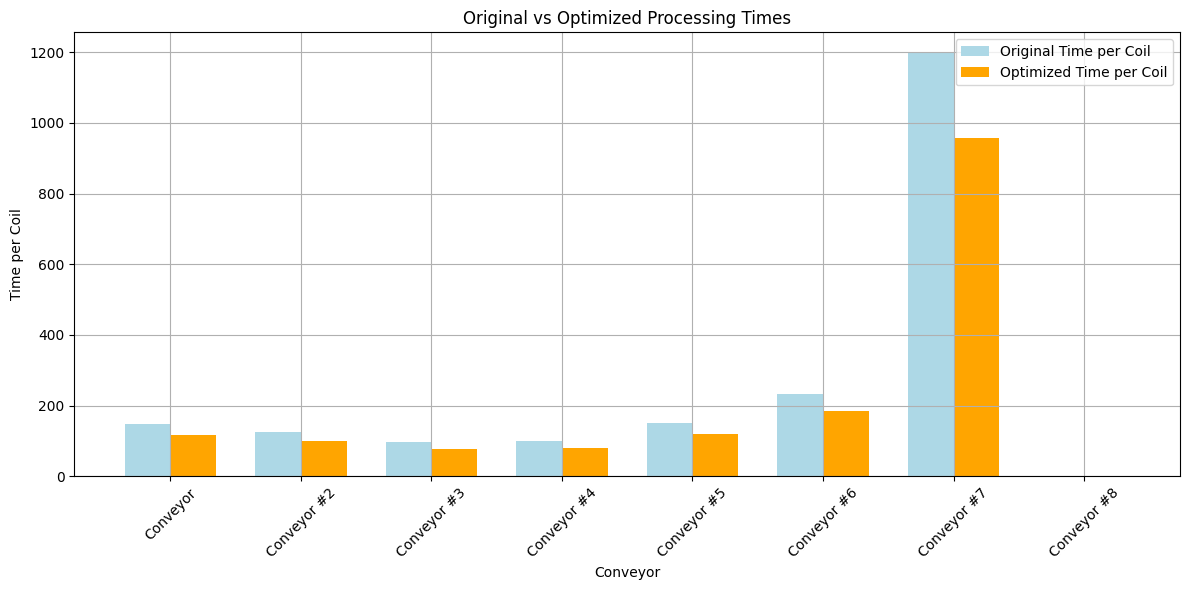

In [ ]:
# --- Optimization Suggestions ---
print("\nOptimization Suggestions for Reducing Bottlenecks:")

# Suggestion 1: Add Parallel Conveyors
worst_bottleneck = max(bottleneck_scores.items(), key=lambda x: x[1])[0]
print(f"1. Add Parallel Conveyors for {worst_bottleneck}:")
print(f"   - {worst_bottleneck} has the highest bottleneck score ({bottleneck_scores[worst_bottleneck]:.2f}). "
      "Adding a parallel conveyor to split the load could reduce processing time and inventory buildup.")

# Suggestion 2: Dynamic Speed Adjustment
print("2. Implement Dynamic Speed Adjustment:")
print("   - Adjust conveyor speeds dynamically based on inventory levels. If inventory exceeds thresholds, increase speed.")

# Suggestion 3: Buffer Zones
print("3. Introduce Buffer Zones:")
print("   - Add small buffer zones before high-bottleneck conveyors to smoothen the flow and reduce overload.")

# Suggestion 4: Redistribute Load
print("4. Redistribute Load to Underutilized Conveyors:")
print("   - Use conveyors with lower inventory and throughput to help balance the overall load.")

# Suggestion 5: Predictive Maintenance
print("5. Implement Predictive Maintenance Scheduling:")
print("   - Analyze historical data peaks to schedule maintenance during low-load periods.")

# Plot Original vs Optimized Time per Part (Bar Chart)
if valid_conveyors:
    plt.figure(figsize=(12, 6))
    bar_width = 0.35
    x = np.arange(len(valid_conveyors))
    plt.bar(x - bar_width/2, current_times, bar_width, label="Original Time per Coil", color='lightblue')
    plt.bar(x + bar_width/2, optimized_times, bar_width, label="Optimized Time per Coil", color='orange')
    plt.xlabel("Conveyor")
    plt.ylabel("Time per Coil")
    plt.title("Original vs Optimized Processing Times")
    plt.xticks(x, valid_conveyors, rotation=45)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

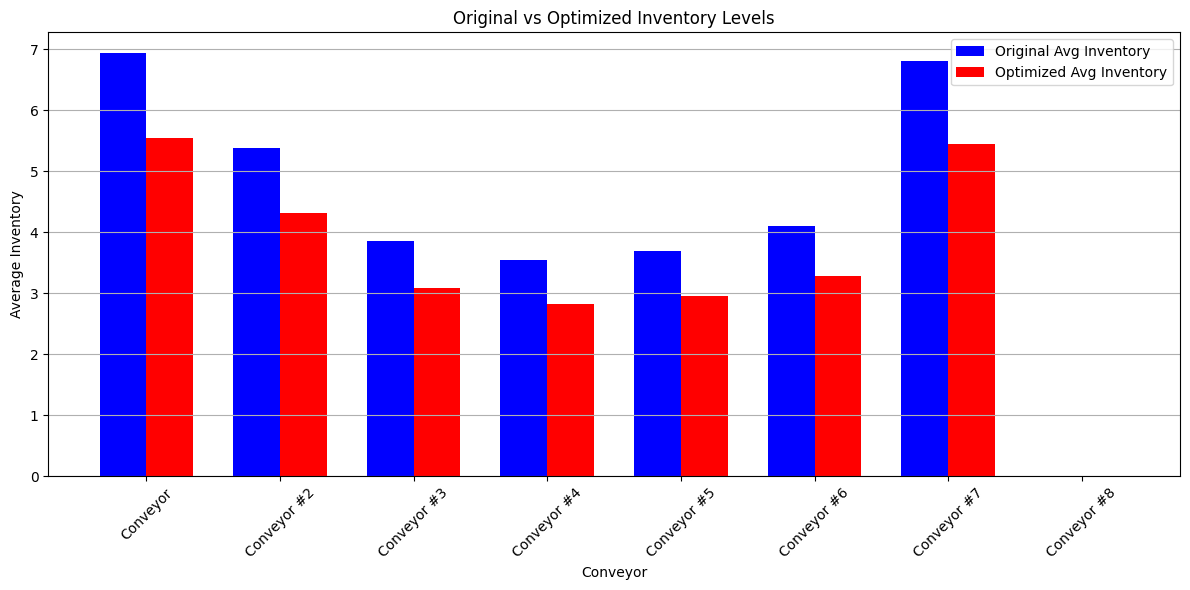

In [ ]:
# Plot Original vs Optimized Inventory
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(conveyor_names))
plt.bar(x - bar_width/2, [inventory_stats[c]["Average Inventory"] for c in conveyor_names], bar_width, label="Original Avg Inventory", color='blue')
plt.bar(x + bar_width/2, [new_inventory[c] for c in conveyor_names], bar_width, label="Optimized Avg Inventory", color='red')
plt.xlabel("Conveyor")
plt.ylabel("Average Inventory")
plt.title("Original vs Optimized Inventory Levels")
plt.xticks(x, conveyor_names, rotation=45)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

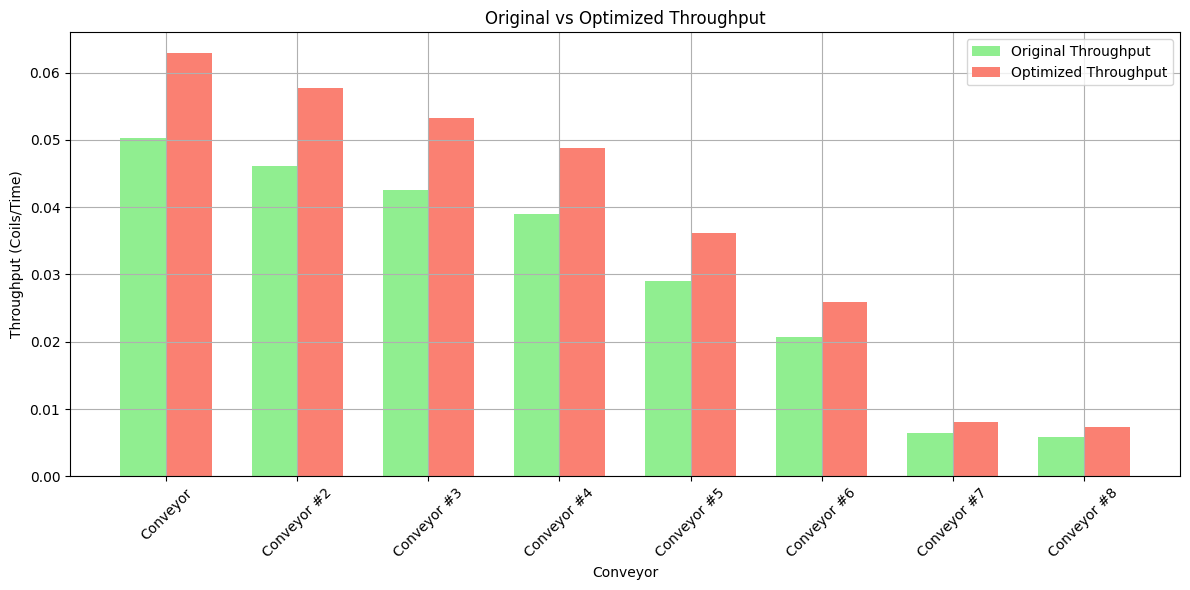

In [ ]:
# Plot Original vs Optimized Throughput
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(conveyor_names))
plt.bar(x - bar_width/2, [capacity_stats[c]["Throughput"] for c in conveyor_names], bar_width, label="Original Throughput", color='lightgreen')
plt.bar(x + bar_width/2, [new_throughputs[c] for c in conveyor_names], bar_width, label="Optimized Throughput", color='salmon')
plt.xlabel("Conveyor")
plt.ylabel("Throughput (Coils/Time)")
plt.title("Original vs Optimized Throughput")
plt.xticks(x, conveyor_names, rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# === Final Confirmation ===
print("\n🎉 Optimization Completed Successfully!")


🎉 Optimization Completed Successfully!
